<a href="https://colab.research.google.com/github/saurater/machine_learning/blob/main/RNN_Recurrent_Neural_Network_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN - Recurrent Neural Network - Stock Prices

In [26]:
import numpy as np

In [27]:
import matplotlib.pyplot as plt

In [28]:
import pandas as pd

In [29]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [30]:
dataset_train.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [31]:
training_set = dataset_train.iloc[:, 2:3].values

In [32]:
training_set 

array([[332.83],
       [333.87],
       [330.75],
       ...,
       [794.23],
       [785.93],
       [782.78]])

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
sc = MinMaxScaler(feature_range = (0, 1))

In [35]:
training_set_scaled = sc.fit_transform(training_set)

In [36]:
X_train = []
y_train = []

In [37]:
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [38]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [41]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [43]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [44]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [45]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [46]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

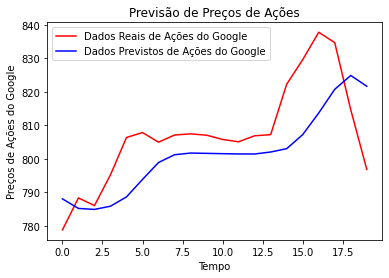

In [47]:
plt.plot(real_stock_price, color = 'red', label = 'Dados Reais de Ações do Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Dados Previstos de Ações do Google')
plt.title('Previsão de Preços de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preços de Ações do Google')
plt.legend()
plt.show()